# **Airline Passenger Satisfaction**
In this project, we will use the CRISP-DM process to predict a passenger's satisfaction using its attributes. The data set we will be working with contains an airline passenger satisfaction survey. For each passenger we have information about factors of the flight.

> **Customer Demographic Data**
```
3.   Age
1.   Gender: Female, Male
2.   Customer Type: Loyal customer, Disloyal customer
4.   Type of Travel: Personal Travel, Business Travel
```
> **In-flight Experiences** (*Satisfaction level: 0 = Not Applicable, 1-5)
```
7.  Inflight wifi service*
11. Food and drink*
13. Seat comfort*
14. Inflight entertainment*
16. Leg room service*
19. Inflight service*
20. Cleanliness*
```
> **Flight Information & Experiences** (*Satisfaction level: 0 = Not Applicable, 1-5)
```
5. Class: Business, Eco, Eco Plus
6. Flight distance
8. Departure/Arrival time convenient* 
9. Ease of Online booking*
10. Gate location*
12. Online boarding*
15. On-board service*
17. Baggage handling*
18. Check-in service*
21. Departure Delay in Minutes
22. Arrival Delay in Minutes
```

# Table of Contents:
1. <a href='#busund'>Business Understanding</a>
2. <a href='#dataund'>Data Understanding : Exploratory Data Analysis</a>

      2.1. <a href='#shapeanalysis'>Shape Analysis</a>

      2.2. <a href='#backanalysis'>Background Analysis</a>

3. <a href='#prepro'>Data Preparation : Data Pre-Processing</a>

      3.1. <a href='#dc'>Data Cleaning</a>

      3.2. <a href='#dt'>Data Transformation</a>

      3.3. <a href='#dr'>Data Reduction</a>

4. <a href='#modeling'>Modeling</a>
   
   4.1. <a href='#modelb'>Model Building</a> 

5. <a href='#evaluation'>Evaluation</a>

   5.1. <a href='#modelc'>Model Comparison</a>

   5.2. <a href='#modelo'>Model Optimisation</a>  

6. <a href='#deploy'>Deployment</a>

# **1 | <a id='busund'>Business Understanding</a>**
The CRISP-DM process starts with the understanding of the business problem. 
In this project we try to answer to the following 3 business questions:

* What factors lead to customer satisfaction for an Airline?
* What factors are highly correlated to a satisfied (or dissatisfied) passenger? 
* Can you predict passenger satisfaction?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **2 | <a id='dataund'>Data Understanding : Exploratory Data Analysis</a>**
The data is taken from the online community platform for data science and machine learning and can be downloaded <a href = "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275"> here </a>. 

First of all let us import all he necessary libraries.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from numpy import array 
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, matthews_corrcoef
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
import pickle

Let us read in the data and have a first look at it:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMP/Data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMP/Data/test.csv')

In [ ]:
# union two tables
df = pd.concat([df_train,df_test])


### **2.1 | <a id='shapeanalysis'>Shape Analysis</a>**

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
 #different existing variables
df.keys()

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df.size

3247000

In [ ]:
df.shape

(129880, 25)

 Each row corresponds to one passenger, and each column to a specific feature.
Let's look at the first and last rows of the data set:

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


Let's take a closer look at the dataset data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

You may notice the following:
* The first two features are useless and will not affect the classification, so you should get rid of them.

* Many columns contain categorical values but are of type 'object' or 'int64'. 

The first 22 features have been detailed above. The satisfaction feature is the target.

Get summary information about quantitative features by calling the "describe" method with default parameters:

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


For each quantitative attribute, mean values, standard deviation, minimum and maximum values, median and quartile values are given.



In [ ]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    



The column corresponding to the Arrival Delay in Minutes feature has missing values.




### **2.2 | <a id='backanalysis'>Background Analysis</a>**

Let's look at the ratio of the values of the target variable:

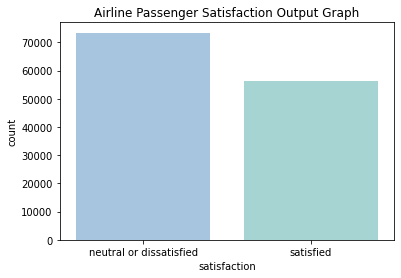

In [ ]:
# Check data balance of target variable

sns.countplot(x='satisfaction', data=df, palette=['#9fc5e8',"#9edcd9"])
plt.title("Airline Passenger Satisfaction Output Graph")
plt.show()

As you can see from the pie chart, the selection is more or less balanced.

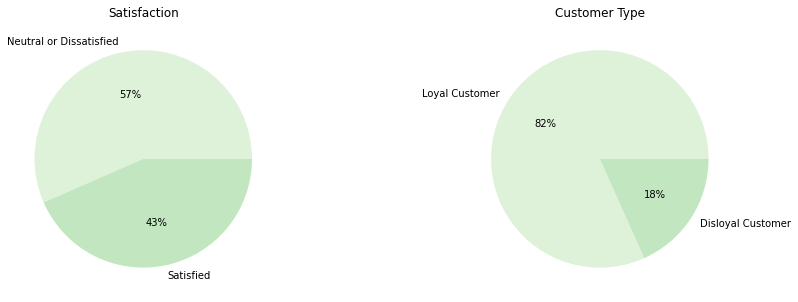

Counter({'neutral or dissatisfied': 73452, 'satisfied': 56428})
Counter({'Loyal Customer': 106100, 'disloyal Customer': 23780})


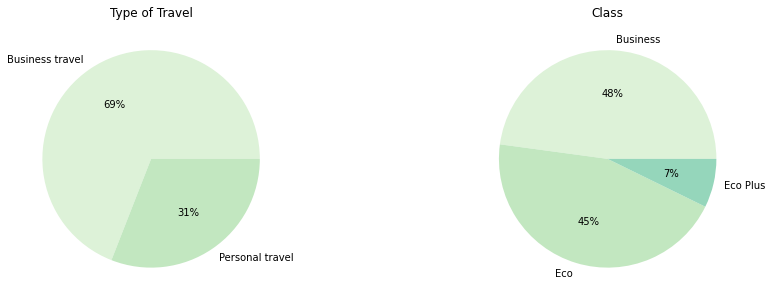

Counter({'Business travel': 89693, 'Personal Travel': 40187})
Counter({'Business': 62160, 'Eco': 58309, 'Eco Plus': 9411})


In [ ]:
# Create first two pie charts
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
colors = sns.color_palette('GnBu')[0:2]
plt.pie(df.satisfaction.value_counts(), labels = ['Neutral or Dissatisfied', 'Satisfied'], colors = colors, autopct='%.0f%%')
plt.title('Satisfaction')

ax1 = plt.subplot2grid((1,2),(0,1))
color2 = sns.color_palette('GnBu')[0:3]
plt.pie(df['Customer Type'].value_counts(), labels = ['Loyal Customer', 'Disloyal Customer'], colors = color2, autopct='%.0f%%')
plt.title('Customer Type')
plt.show()

print(Counter(df.satisfaction))
print(Counter(df['Customer Type']))

# Create another two pie charts

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['Type of Travel'].value_counts(), labels = ['Business travel', 'Personal travel'], colors = color2, autopct='%.0f%%')
plt.title('Type of Travel')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(df['Class'].value_counts(), labels = ['Business', 'Eco', 'Eco Plus'], colors = color2, autopct='%.0f%%')
plt.title('Class')
plt.show()

print(Counter(df['Type of Travel']))
print(Counter(df['Class']))

The survey collected 129,880 responses from passengers aged 7-85 with 82% loyal customers in total. The majority of flight purposes were for business travel, but only 48% of passengers purchased business class tickets. As for the target variable, the distribution of passenger satisfaction was fairly balanced. Nearly half of the customers expressed positive feedback and the rest were neutral to dissatisfied.

Let's calculate the correlation matrix for features and use the visual image of this matrix:

In [ ]:
#Matrice de corrélation
corr = df.corr()
corr

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002199,0.000109,0.001160,-0.001320,0.002141,0.001388,0.003799,-0.004171,-0.000912,-0.001724,0.000485,0.000170,0.003046,-0.000626,-0.004747,-0.001990,-0.001083,0.002358,0.002099
id,0.002199,1.000000,0.020322,0.095504,-0.023096,-0.002192,0.013400,-0.000113,-0.000510,0.055538,0.052164,0.001620,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.017643,-0.035657
Age,0.000109,0.020322,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
Flight Distance,0.001160,0.095504,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
Inflight wifi service,-0.001320,-0.023096,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
Departure/Arrival time convenient,0.002141,-0.002192,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
Ease of Online booking,0.001388,0.013400,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
Gate location,0.003799,-0.000113,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
Food and drink,-0.004171,-0.000510,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
Online boarding,-0.000912,0.055538,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730


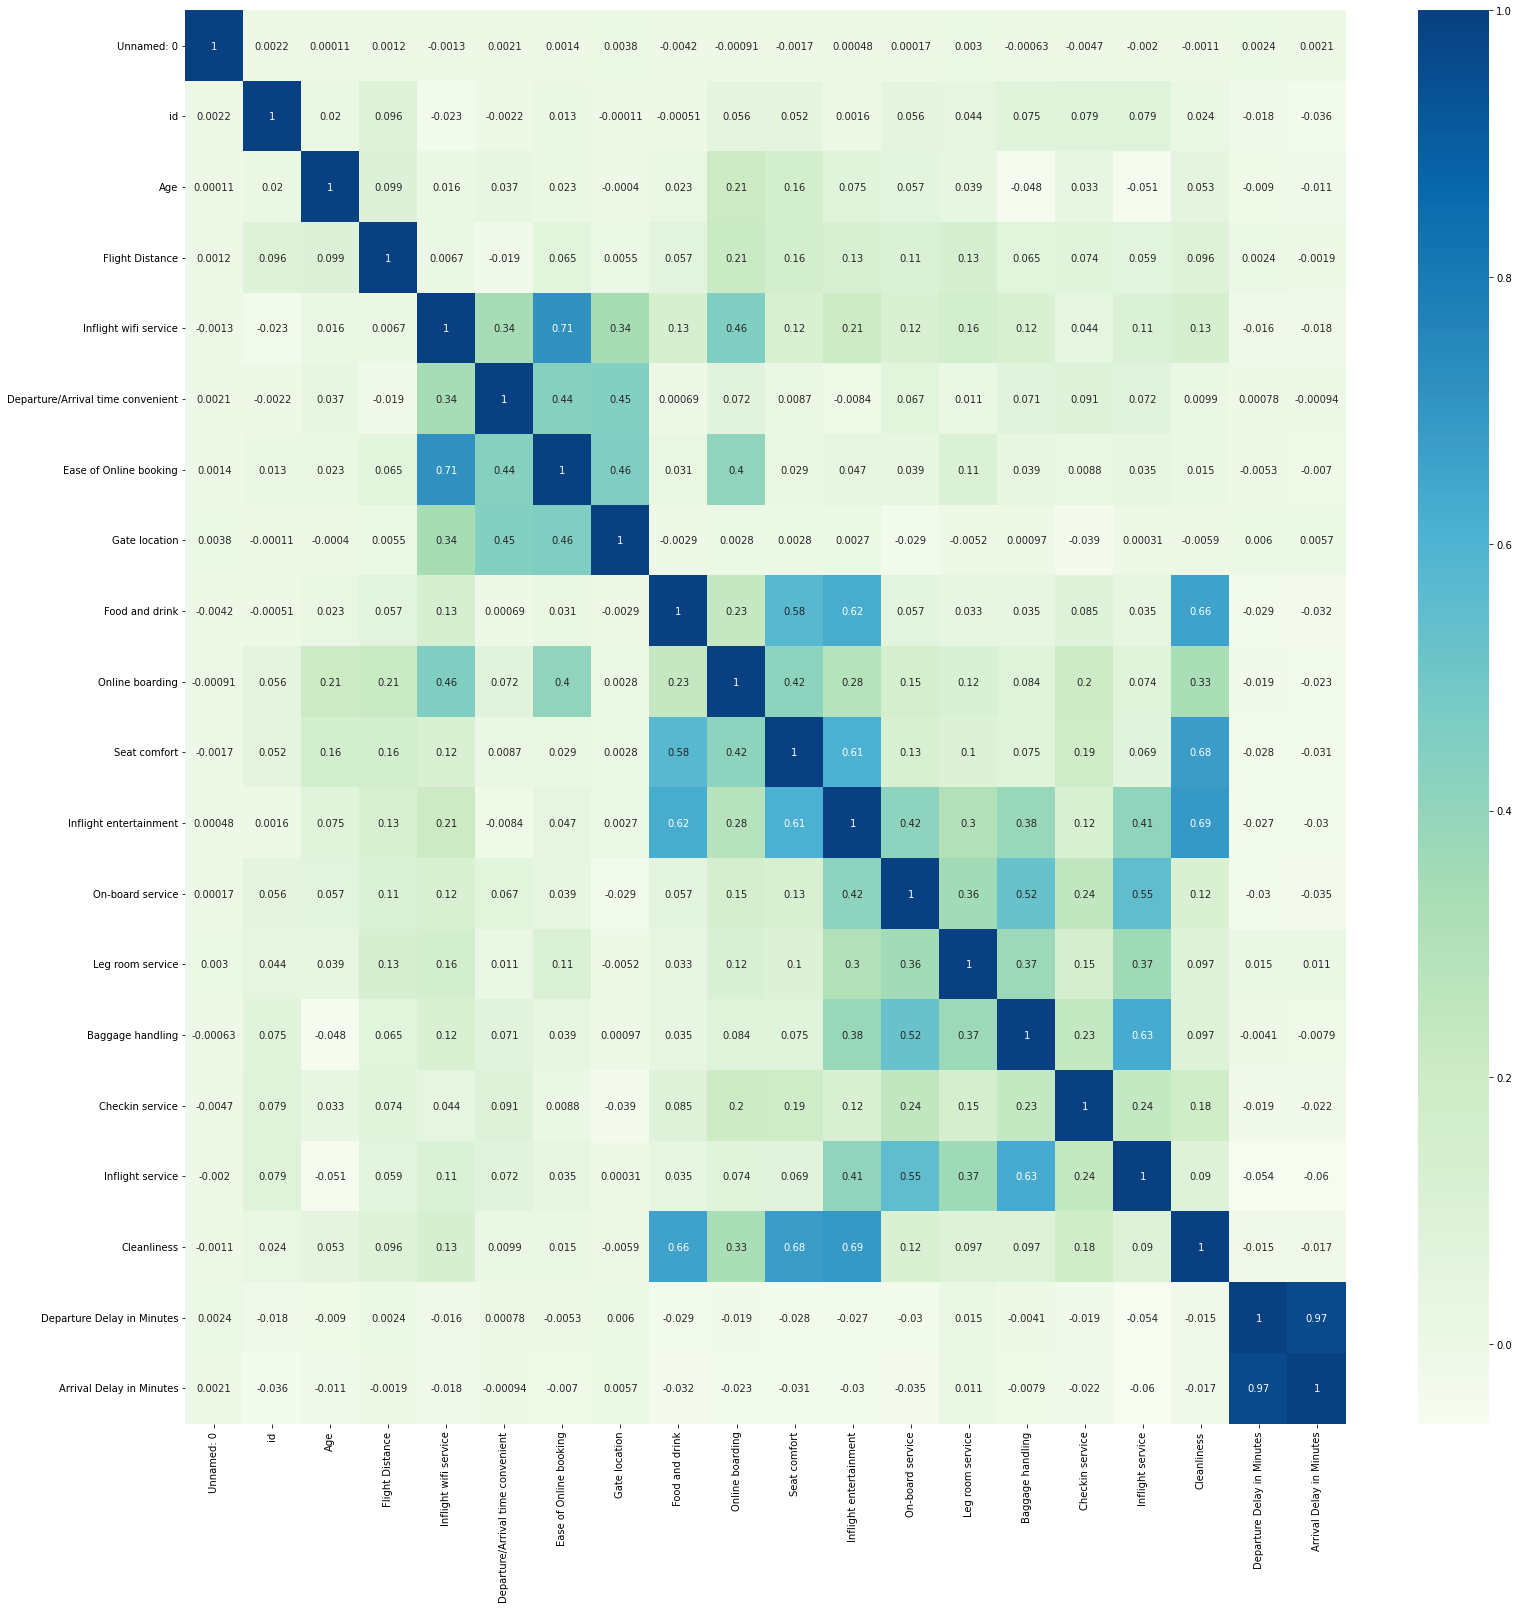

In [ ]:
corm = df.corr()
plt.figure(figsize=(26,26))
sns.heatmap(corm, annot=True, cmap='GnBu')

You can see that there is a strong correlation between the features 'Departure delay in minutes' and 'Arrival delay in minutes'. The value of the correlation coefficient reaches the following value:

In [ ]:

corr.where(np.triu(corr > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965291
Inflight wifi service       Ease of Online booking      0.714807
Inflight entertainment      Cleanliness                 0.692511
Seat comfort                Cleanliness                 0.679613
Food and drink              Cleanliness                 0.658054
Baggage handling            Inflight service            0.629237
Food and drink              Inflight entertainment      0.623461
Seat comfort                Inflight entertainment      0.611837
Food and drink              Seat comfort                0.575846
On-board service            Inflight service            0.551569
                            Baggage handling            0.520296
dtype: float64

Let's build a scatterplot for these features:

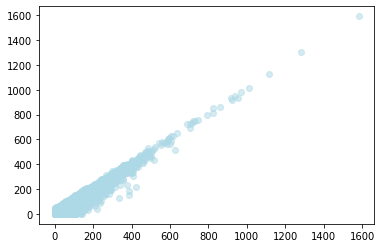

In [ ]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5,  c='lightblue')
pass

You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

Consider the ratio of values for each of the categorical features:

In [ ]:
#categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
#categ = df.iloc[:,categorical_indexes]
#fig, axes = plt.subplots(6, 3, figsize = (20, 20))
#for i, col in enumerate(categ):
 #   column_values = df[col].value_counts()
#    labels = column_values.index
#    sizes = column_values.values
 #   axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("GnBu"), autopct = '%1.0f%%', startangle = 90)
#    axes[i//3, i%3].axis('equal')
#    axes[i//3, i%3].set_title(col)
#plt.show()

Some conclusions about the considered sample:

* The number of men and women in this sample is approximately the same
* The vast majority of the airline's customers are repeat customers
* Most of our clients flew for business rather than personal reasons
* About half of the passengers were in business class
* More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)
* More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)

Now let's look at a few "boxes with whiskers" (box diagrams)

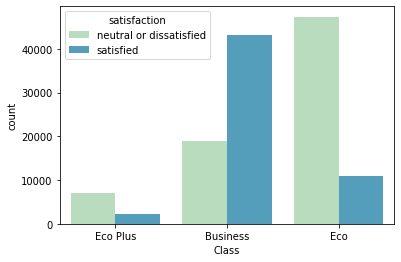

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "GnBu", data = df)
plt.show()

This chart is very revealing. You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied.

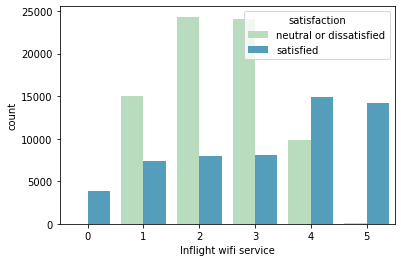

In [ ]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "GnBu", data = df)
plt.show()

According to this graph, you can see that almost all passengers who rated the wifi service 5 out of 5 points were satisfied with the flight.

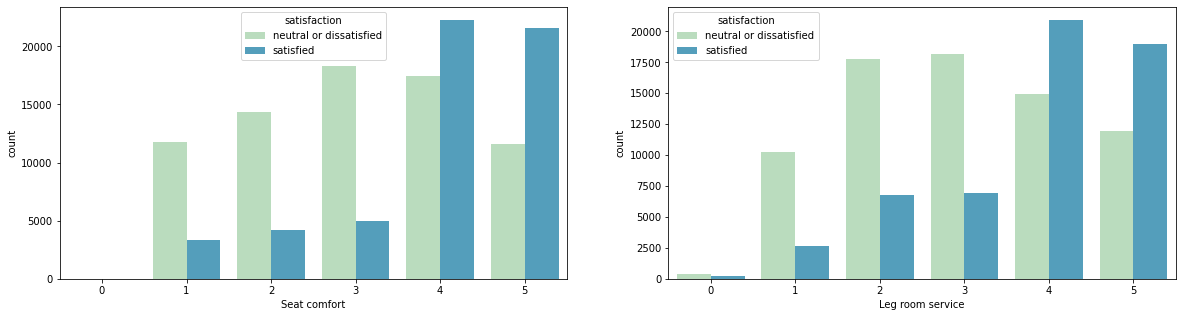

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "GnBu", data = df,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "GnBu", data = df, ax = ax[1])
plt.show()

From the graphs above, we can conclude the following: most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


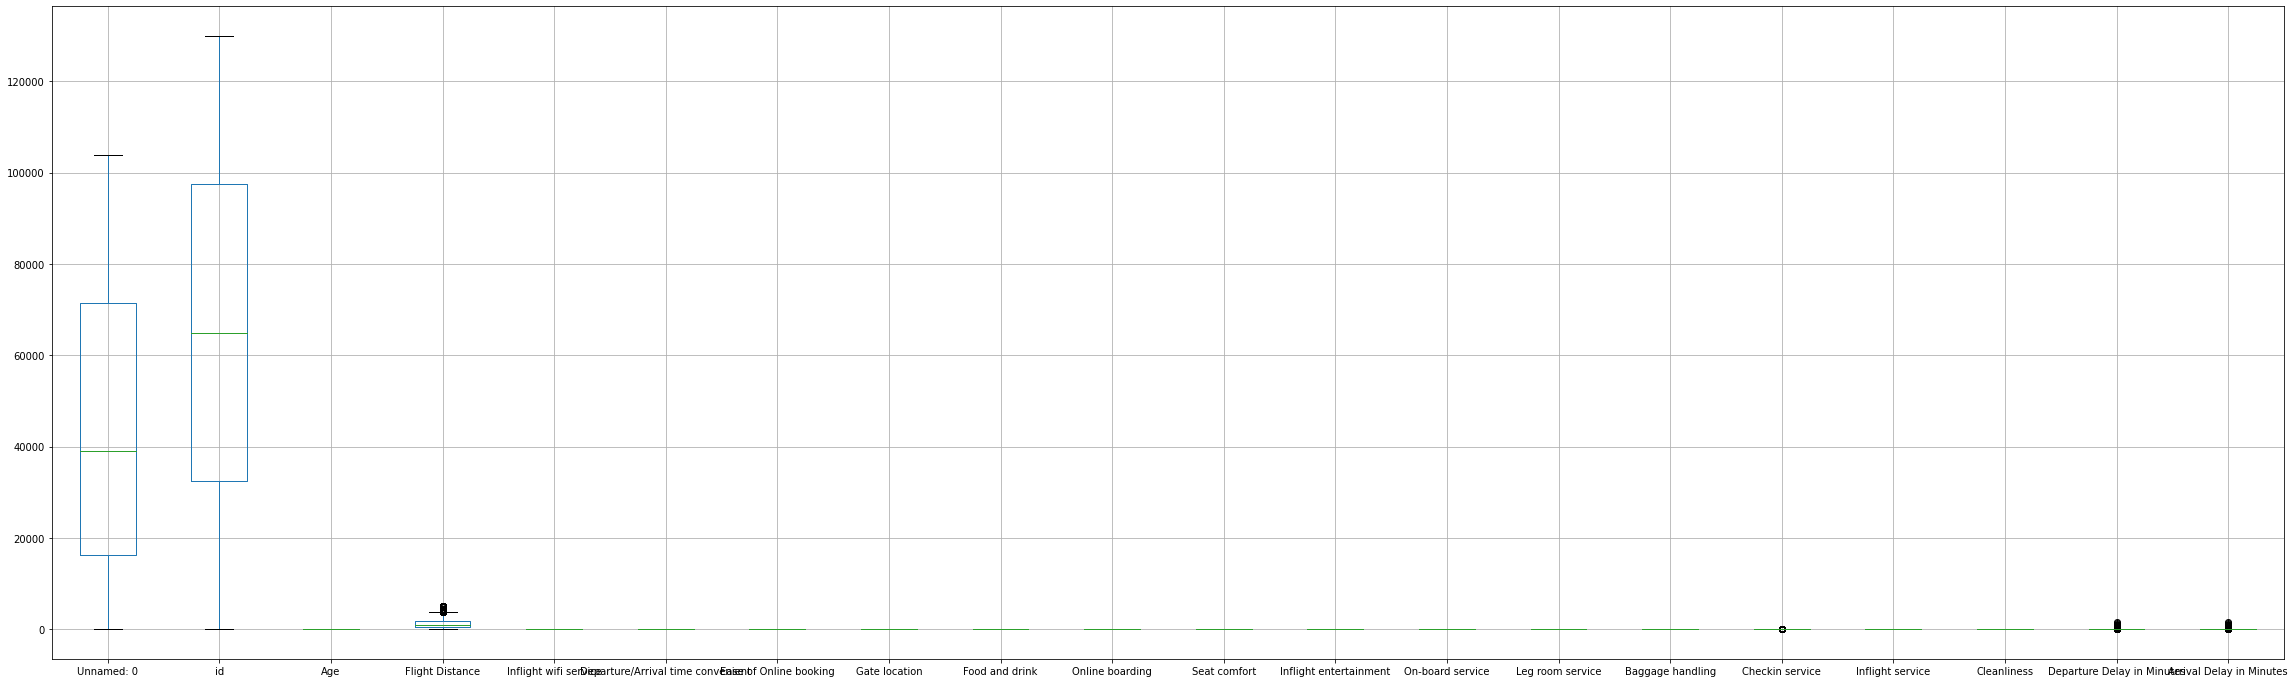

In [ ]:
 boxplot = df.boxplot(figsize=(40,12)) 

We can see that the three variables Flight Distance, Departure Delay in Minutes and Arrival Delay in Minutes have some outliers. Other columns did not contanin any outliers.

Boxplot to check for outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


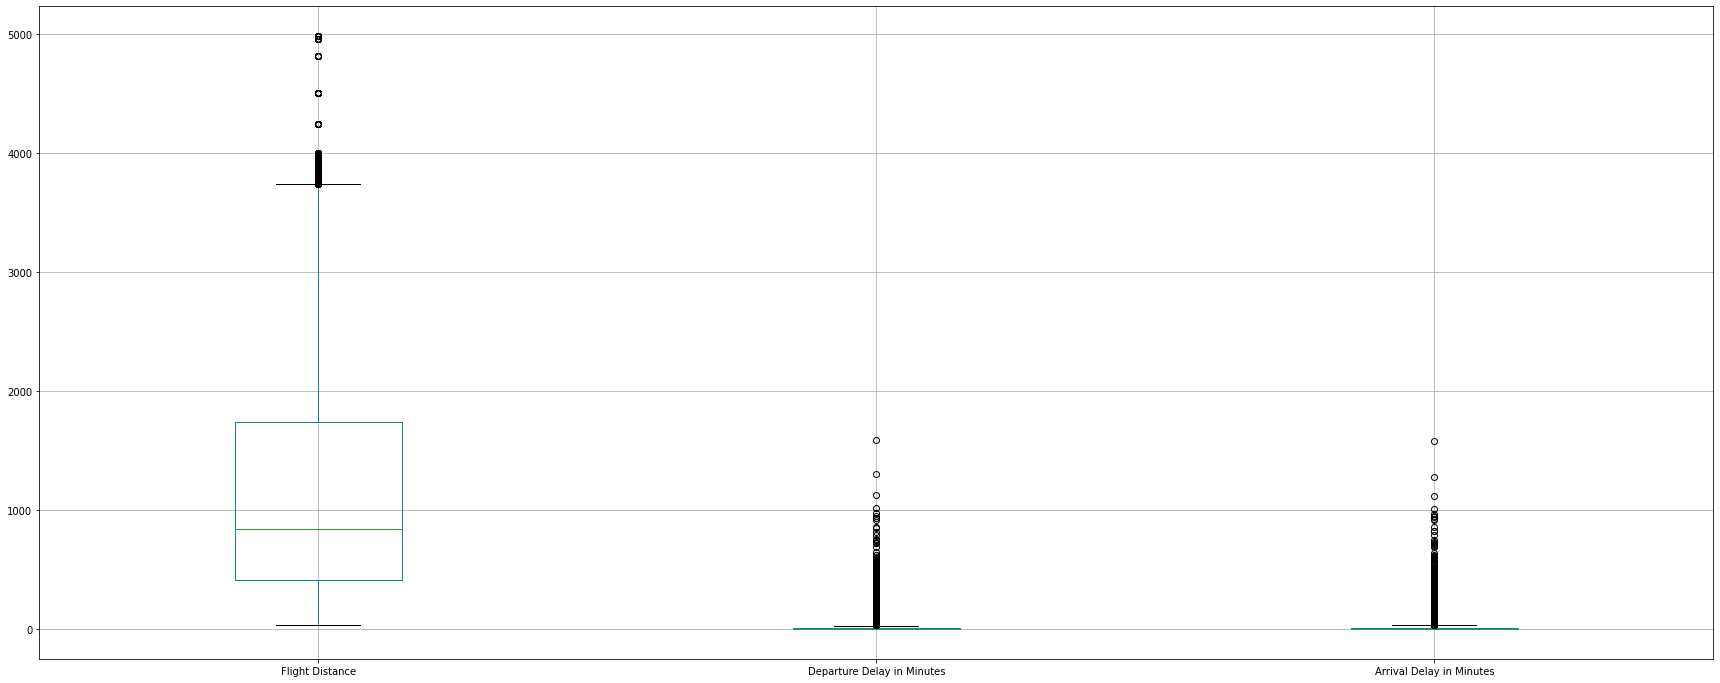

In [ ]:
df.boxplot(["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"],figsize=(30,12))

## **3 | <a id='prepro'>Data Preparation : Processing</a>**
### **3.1. <a id='dc'>Data Cleaning</a>**

The first two features are useless and will not affect the classification, so we should get rid of them.

In [ ]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

Let's replace categorical values type with a special one designed for storing categorical values.

In [ ]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')

Now we get information about categorical features:

In [ ]:
df.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding            

In [ ]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

We usually can't have any missing values in the data if we want to use them for predictive modeling. Based on the data set preview above, we can see that Arrival Delay in Minutes column contains missing values. Let's replace these values with medians in the columns corresponding to quantitative features:

In [ ]:
#*********Handling Missing Values***********
df["Arrival Delay in Minutes"].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [ ]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465
std,15.119360,997.452477,38.071126,38.416353
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


This table shows that there are no more missing values.

In [ ]:
df=df.drop_duplicates(keep='first')
df.shape


(129880, 23)

Remove Outliers

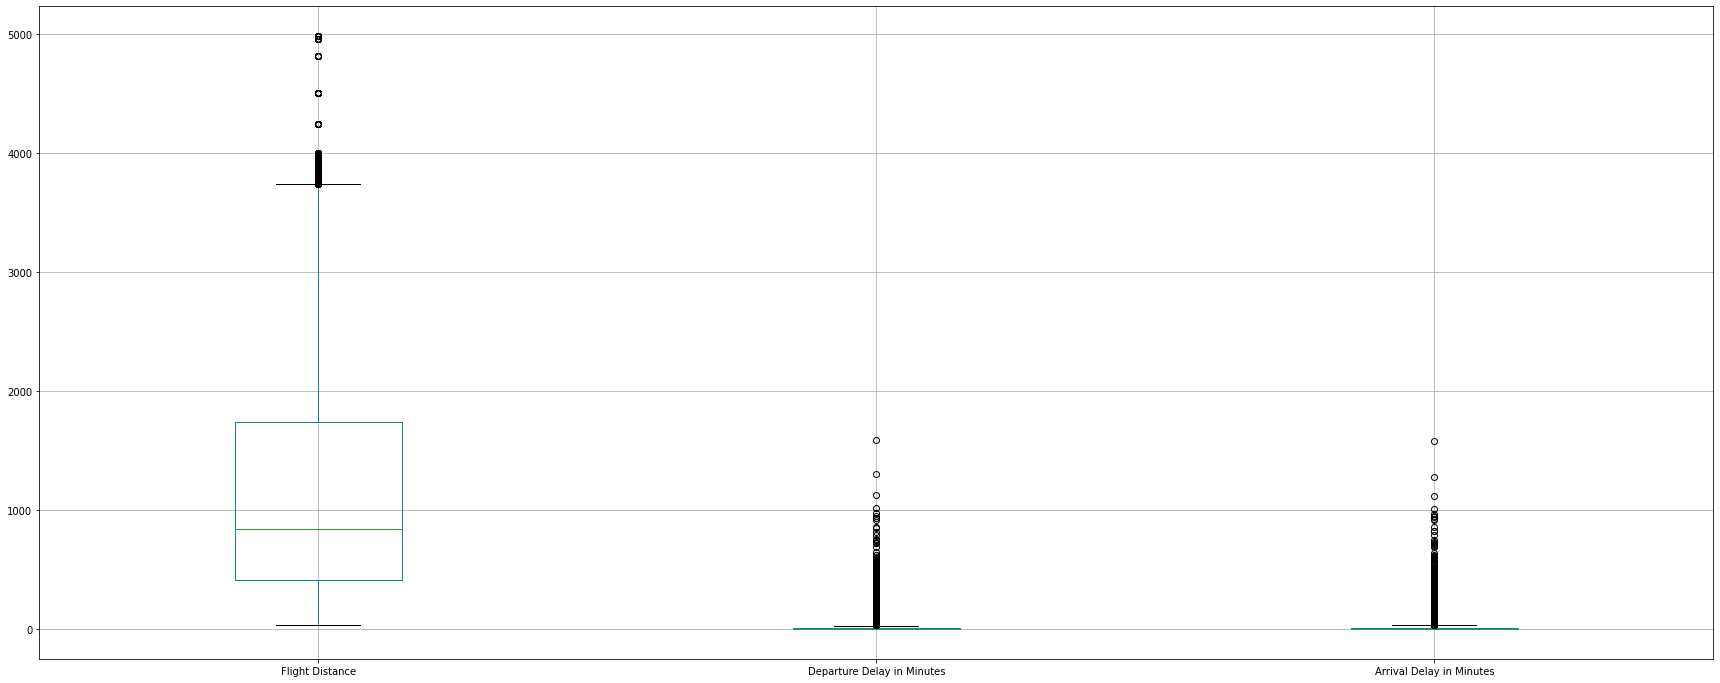

In [ ]:
df.boxplot(["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"],figsize=(30,12))

In [ ]:
def outlier_fix(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    print('Quartile 1 =', q1)
    print('Quartile 3 =', q3)
    print('Inter Quartile Range =', iqr)
    print('Low =', low)
    print('High =', high)
    df.loc[df[col] < low, col] = low
    df.loc[df[col] > high, col] = high

In [ ]:
outlier_fix(df,'Flight Distance')

Quartile 1 = 414.0
Quartile 3 = 1744.0
Inter Quartile Range = 1330.0
Low = -1581.0
High = 3739.0


In [ ]:
outlier_fix(df,'Departure Delay in Minutes')

Quartile 1 = 0.0
Quartile 3 = 12.0
Inter Quartile Range = 12.0
Low = -18.0
High = 30.0


In [ ]:
outlier_fix(df,'Arrival Delay in Minutes')

Quartile 1 = 0.0
Quartile 3 = 13.0
Inter Quartile Range = 13.0
Low = -19.5
High = 32.5


In [ ]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

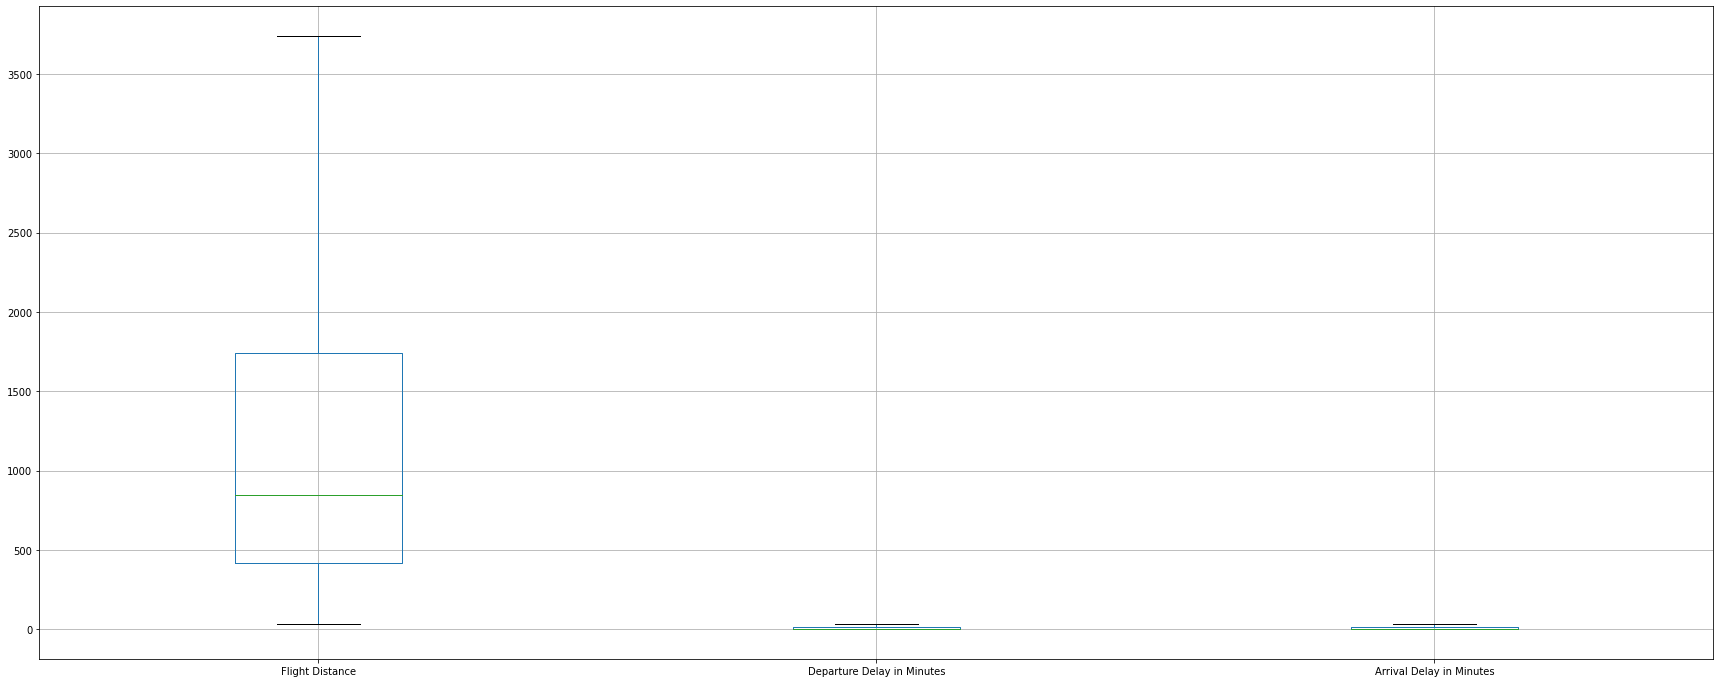

In [ ]:
df.boxplot(["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"],figsize=(30,12))

We've gotten rid of the outliers.

In [ ]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1186.995681,7.380798,7.909386
std,15.119360,988.394696,11.209935,11.971151
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,3739.000000,30.000000,32.500000


### **b. <a id='dt'>Data Transformation</a>**

Handling categorical features

In [ ]:
# Change categorical variables into factors 
cat_features = df.select_dtypes(include=['category']).columns.tolist()
df[cat_features] = df[cat_features].apply(lambda x: pd.factorize(x)[0])
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
# Assign 1 to satisfaction
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

Let's split the data into training and test samples in a ratio of 6:4 (60% - training sample, 40% - test):

In [ ]:
# define dataset
df = df.dropna()
X = df.iloc[:, 1:-1] # Remove target variable
y = df.satisfaction



# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

Normalize Features

In [ ]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,0,0,0,0,...,0,0,0,0,0,0,0,25,18.0,0
1,0,1,25,1,1,235,0,1,0,1,...,1,1,1,1,1,1,1,1,6.0,0
2,1,0,26,1,1,1142,1,1,1,2,...,0,0,0,0,0,1,0,0,0.0,1
3,1,0,25,1,1,562,1,2,2,3,...,2,2,1,1,1,1,2,11,9.0,0
4,0,0,61,1,1,214,0,3,0,1,...,3,3,2,0,2,2,3,0,0.0,1


### **c. <a id='dr'>Data Reduction</a>**

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,0,0,0,0,...,0,0,0,0,0,0,0,25,18.0,0
1,0,1,25,1,1,235,0,1,0,1,...,1,1,1,1,1,1,1,1,6.0,0
2,1,0,26,1,1,1142,1,1,1,2,...,0,0,0,0,0,1,0,0,0.0,1
3,1,0,25,1,1,562,1,2,2,3,...,2,2,1,1,1,1,2,11,9.0,0
4,0,0,61,1,1,214,0,3,0,1,...,3,3,2,0,2,2,3,0,0.0,1


<a id='featuresselection'>**Features Selection**</a>

In [ ]:
select_feature10 = SelectKBest(score_func=chi2, k=10)
feature_detail = select_feature10.fit_transform(X, y)

filter = select_feature10.get_support()
features = array(list(X))
print("Selected best 10 features:")
print(features[filter]) 

Selected best 10 features:
['Customer Type' 'Age' 'Type of Travel' 'Flight Distance'
 'Inflight wifi service' 'Ease of Online booking' 'Online boarding'
 'Inflight service' 'Departure Delay in Minutes'
 'Arrival Delay in Minutes']


In [ ]:
select_feature15 = SelectKBest(score_func=chi2, k=15)
feature_detail = select_feature15.fit_transform(X, y)

filter = select_feature15.get_support()
features = array(list(X))
print("Selected best 15 features:")
print(features[filter]) 

Selected best 15 features:
['Customer Type' 'Age' 'Type of Travel' 'Class' 'Flight Distance'
 'Inflight wifi service' 'Departure/Arrival time convenient'
 'Ease of Online booking' 'Online boarding' 'Seat comfort'
 'Leg room service' 'Baggage handling' 'Inflight service'
 'Departure Delay in Minutes' 'Arrival Delay in Minutes']


# **4 | <a id='modeling'>Modeling</a>**

## **4.2. <a id='modelb'>Model Building</a>**

To identify whether a passenger was satisfied with the overall flight experience, 7 supervised models were implemented. The basic concepts of each algorithm were briefly explained as the following.

* **XGBOOST** : Extreme gradient boosting is one of the boosting methods, it refers to the base model's classification efficiency and differentiates weights to base models, instead of sample data. A biggest advantage of XGBoost is regularization, helping avoid overfitting issues happened to tree-based models.

* **Random Forest** : To achieve higher accuracy than an individual tree, the random forest algorithm is introduced as a set of decision trees. It uses one of the ensemble learning methods, bagging, and is featured for the random selection of sample subsets to determine tree structures.

* **CatBoost** : Is an algorithm for gradient boosting on decision trees,used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks. It is the only boosting algorithm with very less prediction time. Thanks to its symmetric tree structure. It is comparatively 8x faster than XGBoost while predicting.

* **KNN** : Works on a principle assuming every data point falling in near to each other is falling in the same class. In other words, it classifies a new data point based on similarity.

* **Naive Bayes** : A classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

* **Decision Tree** : A decision tree demonstrates a series of sequential decisions (or nodes/sub-nodes) to distinguish the situation and explain the corresponding category. If we look at the graph of the tree, it is intuitive as to how humans make decisions upon specified conditions.

* **Ensemble Model** : A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

### <a id='xg'>XGBOOST</a>

In [ ]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

### <a id='rf'>Random Forest</a>

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

### <a id='cb'>CatBoost</a>

In [ ]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)
y_predcb = cb.predict(X_test)

Learning rate set to 0.066174
0:	learn: 0.6127630	total: 23.3ms	remaining: 23.3s
1:	learn: 0.5534784	total: 42.8ms	remaining: 21.3s
2:	learn: 0.4966477	total: 62.6ms	remaining: 20.8s
3:	learn: 0.4474174	total: 82.8ms	remaining: 20.6s
4:	learn: 0.4046701	total: 105ms	remaining: 20.9s
5:	learn: 0.3697516	total: 128ms	remaining: 21.2s
6:	learn: 0.3443617	total: 151ms	remaining: 21.4s
7:	learn: 0.3301064	total: 171ms	remaining: 21.1s
8:	learn: 0.3165495	total: 196ms	remaining: 21.6s
9:	learn: 0.3020152	total: 217ms	remaining: 21.5s
10:	learn: 0.2846472	total: 237ms	remaining: 21.3s
11:	learn: 0.2706933	total: 258ms	remaining: 21.2s
12:	learn: 0.2569788	total: 279ms	remaining: 21.2s
13:	learn: 0.2444419	total: 300ms	remaining: 21.1s
14:	learn: 0.2356700	total: 319ms	remaining: 21s
15:	learn: 0.2308239	total: 340ms	remaining: 20.9s
16:	learn: 0.2261650	total: 360ms	remaining: 20.8s
17:	learn: 0.2186163	total: 380ms	remaining: 20.7s
18:	learn: 0.2125726	total: 406ms	remaining: 21s
19:	learn: 

### <a id='knn'>KNN</a>

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_predk = knn.predict(X_test) 

### <a id='nb'>Naive Bayes</a>

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_prednb = nb.predict(X_test)

### <a id='dt'>Decision Tree</a>

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preddt = dt.predict(X_test)

### <a id='em'>Ensemble Model</a>


In [ ]:
# Ensemble of Models 
estimator = [] 
estimator.append(('cb',CatBoostClassifier())) 
estimator.append(('rf', RandomForestClassifier(random_state=42))) 
estimator.append(('dt', DecisionTreeClassifier())) 

Voting Classifier supports two types of votings : Hard Voting and soft voting.

We choose to use hard voting.

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [ ]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_predem = hard_voting.predict(X_test) 

Learning rate set to 0.066174
0:	learn: 0.6127630	total: 22.2ms	remaining: 22.2s
1:	learn: 0.5534784	total: 42ms	remaining: 20.9s
2:	learn: 0.4966477	total: 62.2ms	remaining: 20.7s
3:	learn: 0.4474174	total: 83.3ms	remaining: 20.7s
4:	learn: 0.4046701	total: 106ms	remaining: 21.1s
5:	learn: 0.3697516	total: 127ms	remaining: 21.1s
6:	learn: 0.3443617	total: 149ms	remaining: 21.1s
7:	learn: 0.3301064	total: 169ms	remaining: 20.9s
8:	learn: 0.3165495	total: 193ms	remaining: 21.3s
9:	learn: 0.3020152	total: 215ms	remaining: 21.3s
10:	learn: 0.2846472	total: 236ms	remaining: 21.3s
11:	learn: 0.2706933	total: 256ms	remaining: 21.1s
12:	learn: 0.2569788	total: 276ms	remaining: 21s
13:	learn: 0.2444419	total: 297ms	remaining: 20.9s
14:	learn: 0.2356700	total: 317ms	remaining: 20.8s
15:	learn: 0.2308239	total: 337ms	remaining: 20.7s
16:	learn: 0.2261650	total: 362ms	remaining: 20.9s
17:	learn: 0.2186163	total: 392ms	remaining: 21.4s
18:	learn: 0.2125726	total: 415ms	remaining: 21.4s
19:	learn: 

# **5 | <a href='#evaluation'>Evaluation</a>**


In [ ]:
#List of models
dict_of_models = {'XGBOOST' : xg,
                  'Random Forest' : rf,
                  'CatBoost' : cb,
                  'KNN': knn,
                  'Naive Bayes' : nb,
                  'DecisionTree': dt
                 }

In [ ]:
def evaluate(model, ypred):

    
    print('Matrice de confusion : \n', confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print('F1 : ', f1_score(y_test, ypred))
    print('MCC : ', matthews_corrcoef(y_test, ypred))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
        
    plt.figure(figsize=(8, 6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

### <a id='xg'>XGBOOST</a>

Matrice de confusion : 
 [[28284  1160]
 [ 1879 20629]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29444
           1       0.95      0.92      0.93     22508

    accuracy                           0.94     51952
   macro avg       0.94      0.94      0.94     51952
weighted avg       0.94      0.94      0.94     51952

F1 :  0.9313949025893403
MCC :  0.8807868491961187


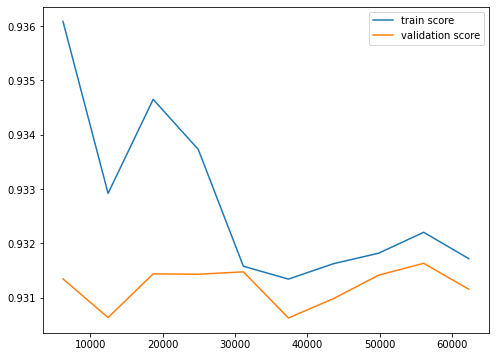

In [ ]:
evaluate(xg, y_pred)

### <a id='rf'>Random Forest</a>

Matrice de confusion : 
 [[28796   648]
 [ 1445 21063]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     29444
           1       0.97      0.94      0.95     22508

    accuracy                           0.96     51952
   macro avg       0.96      0.96      0.96     51952
weighted avg       0.96      0.96      0.96     51952

F1 :  0.9526674054139623
MCC :  0.9180716278191189


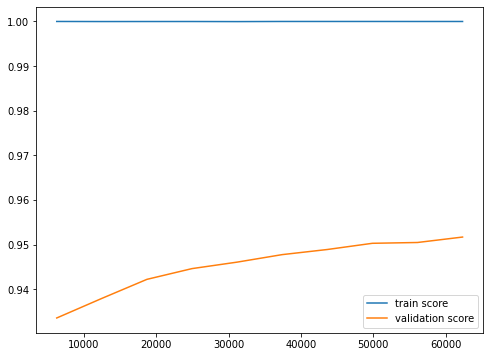

In [ ]:
evaluate(rf, y_predrf)

### <a id='cb'>CatBoost</a>

In [ ]:
print('Matrice de confusion : \n', confusion_matrix(y_test, y_predcb))
print(classification_report(y_test, y_predcb))
print('F1 : ', f1_score(y_test, y_predcb))
print('MCC : ', matthews_corrcoef(y_test, y_predcb))


Matrice de confusion : 
 [[28805   639]
 [ 1235 21273]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29444
           1       0.97      0.95      0.96     22508

    accuracy                           0.96     51952
   macro avg       0.96      0.96      0.96     51952
weighted avg       0.96      0.96      0.96     51952

F1 :  0.9578117964880685
MCC :  0.9265718756251187


Streaming output truncated to the last 5000 lines.
4:	learn: 0.4996244	total: 38.3ms	remaining: 7.62s
5:	learn: 0.4624315	total: 45.8ms	remaining: 7.58s
6:	learn: 0.4392157	total: 53.5ms	remaining: 7.58s
7:	learn: 0.4139456	total: 61.2ms	remaining: 7.58s
8:	learn: 0.3932366	total: 68.8ms	remaining: 7.57s
9:	learn: 0.3797383	total: 76.7ms	remaining: 7.59s
10:	learn: 0.3661371	total: 84.9ms	remaining: 7.63s
11:	learn: 0.3526171	total: 93ms	remaining: 7.66s
12:	learn: 0.3387945	total: 101ms	remaining: 7.66s
13:	learn: 0.3258886	total: 109ms	remaining: 7.68s
14:	learn: 0.3159920	total: 118ms	remaining: 7.73s
15:	learn: 0.3054904	total: 126ms	remaining: 7.76s
16:	learn: 0.2985230	total: 134ms	remaining: 7.76s
17:	learn: 0.2885295	total: 142ms	remaining: 7.75s
18:	learn: 0.2797956	total: 150ms	remaining: 7.75s
19:	learn: 0.2682742	total: 159ms	remaining: 7.78s
20:	learn: 0.2608359	total: 167ms	remaining: 7.78s
21:	learn: 0.2546908	total: 175ms	remaining: 7.78s
22:	learn: 0.2494418	total: 184

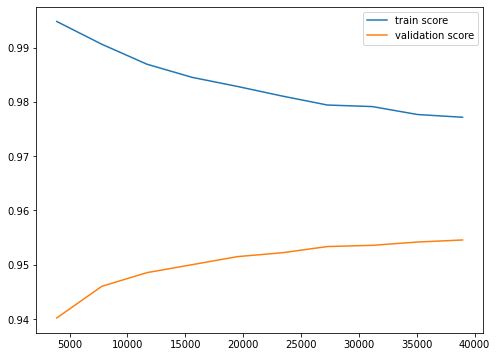

In [ ]:
N, train_score, val_score = learning_curve(cb, X_train, y_train,
                                              cv=2, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
        
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

### <a id='knn'>KNN</a>


In [ ]:
print('Matrice de confusion : \n', confusion_matrix(y_test, y_predk))
print(classification_report(y_test, y_predk))
print('F1 : ', f1_score(y_test, y_predk))
print('MCC : ', matthews_corrcoef(y_test, y_predk))

Matrice de confusion : 
 [[28625   819]
 [ 3724 18784]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     29444
           1       0.96      0.83      0.89     22508

    accuracy                           0.91     51952
   macro avg       0.92      0.90      0.91     51952
weighted avg       0.92      0.91      0.91     51952

F1 :  0.8921184488613427
MCC :  0.824716247929164


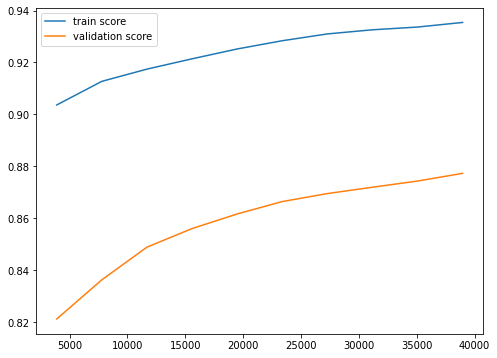

In [ ]:
N, train_score, val_score = learning_curve(knn, X_train, y_train,
                                              cv=2, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
        
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

### <a id='nb'>Naive Bayes</a>

Matrice de confusion : 
 [[25555  3889]
 [ 4257 18251]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     29444
           1       0.82      0.81      0.82     22508

    accuracy                           0.84     51952
   macro avg       0.84      0.84      0.84     51952
weighted avg       0.84      0.84      0.84     51952

F1 :  0.817550618168787
MCC :  0.6801667144207614


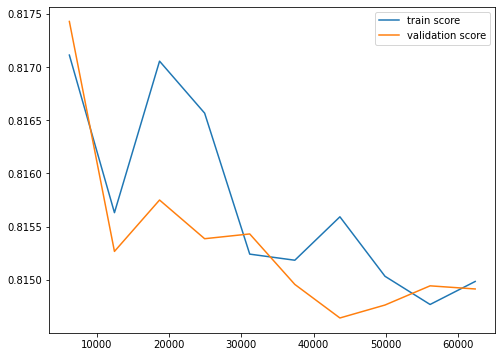

In [ ]:
evaluate(nb, y_prednb)

### <a id='dt'>Decision Tree</a>

Matrice de confusion : 
 [[27861  1583]
 [ 1388 21120]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     29444
           1       0.93      0.94      0.93     22508

    accuracy                           0.94     51952
   macro avg       0.94      0.94      0.94     51952
weighted avg       0.94      0.94      0.94     51952

F1 :  0.9342859038729513
MCC :  0.8836940061740575


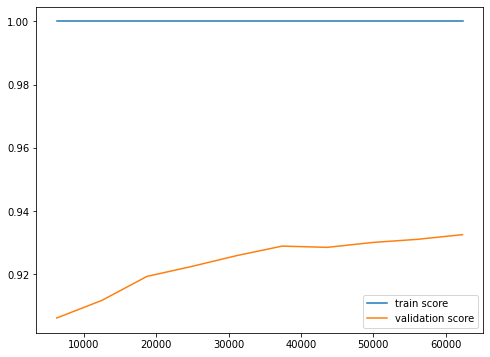

In [ ]:
evaluate(dt, y_preddt)

### <a id='em'>Ensemble Model</a>

In [ ]:
print('Matrice de confusion : \n', confusion_matrix(y_test, y_predem))
print(classification_report(y_test, y_predem))
print('F1 : ', f1_score(y_test, y_predem))
print('MCC : ', matthews_corrcoef(y_test, y_predem))

Matrice de confusion : 
 [[28827   617]
 [ 1316 21192]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29444
           1       0.97      0.94      0.96     22508

    accuracy                           0.96     51952
   macro avg       0.96      0.96      0.96     51952
weighted avg       0.96      0.96      0.96     51952

F1 :  0.9563824266082993
MCC :  0.9243060632002


Streaming output truncated to the last 5000 lines.
4:	learn: 0.4996244	total: 40.8ms	remaining: 8.11s
5:	learn: 0.4624315	total: 48.4ms	remaining: 8.03s
6:	learn: 0.4392157	total: 56.4ms	remaining: 8.01s
7:	learn: 0.4139456	total: 64.7ms	remaining: 8.02s
8:	learn: 0.3932366	total: 72.8ms	remaining: 8.01s
9:	learn: 0.3797383	total: 81.2ms	remaining: 8.04s
10:	learn: 0.3661371	total: 89.1ms	remaining: 8.01s
11:	learn: 0.3526171	total: 97.6ms	remaining: 8.03s
12:	learn: 0.3387945	total: 106ms	remaining: 8.01s
13:	learn: 0.3258886	total: 114ms	remaining: 8.03s
14:	learn: 0.3159920	total: 122ms	remaining: 8.04s
15:	learn: 0.3054904	total: 131ms	remaining: 8.03s
16:	learn: 0.2985230	total: 139ms	remaining: 8.03s
17:	learn: 0.2885295	total: 147ms	remaining: 8.04s
18:	learn: 0.2797956	total: 156ms	remaining: 8.04s
19:	learn: 0.2682742	total: 164ms	remaining: 8.03s
20:	learn: 0.2608359	total: 172ms	remaining: 8.01s
21:	learn: 0.2546908	total: 180ms	remaining: 7.98s
22:	learn: 0.2494418	total: 1

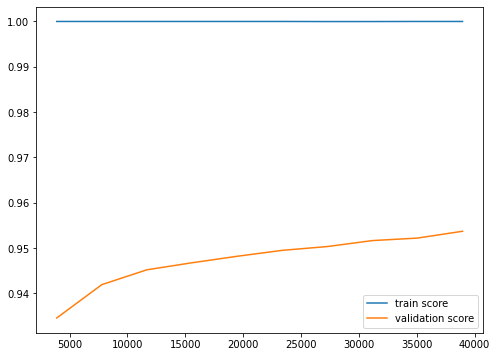

In [ ]:
N, train_score, val_score = learning_curve(hard_voting, X_train, y_train,
                                              cv=2, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
        
plt.figure(figsize=(8, 6))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

## **5.1. <a id='modelc'>Model Comparison</a>**

In [ ]:
mmc1=matthews_corrcoef(y_test, y_pred)
mmc2=matthews_corrcoef(y_test, y_predrf)
mmc3=matthews_corrcoef(y_test, y_predcb)
mmc4=matthews_corrcoef(y_test, y_predk)
mmc5=matthews_corrcoef(y_test, y_prednb)
mmc6=matthews_corrcoef(y_test, y_preddt)
mmc7=matthews_corrcoef(y_test, y_predem)
models = pd.DataFrame({
    'Model': [ 'XGBoost','Random Forest','CatBoost', 'KNeighbors Classifier', ' Naive Bayes', 
              'Decision Tree', 'Ensemble Model'],
    'Accuracy': [accuracy_score(y_test, y_pred),accuracy_score(y_test, y_predrf),accuracy_score(y_test, y_predcb), 
              accuracy_score(y_test, y_predk), accuracy_score(y_test, y_prednb),accuracy_score(y_test, y_preddt),accuracy_score(y_test, y_predem)]
              ,
    'MCC': [mmc1,mmc2,mmc3,mmc4,mmc5,mmc6,mmc7]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,MCC
2,CatBoost,0.963928,0.926572
6,Ensemble Model,0.962793,0.924306
1,Random Forest,0.959713,0.918072
5,Decision Tree,0.942813,0.883694
0,XGBoost,0.941504,0.880787
3,KNeighbors Classifier,0.912554,0.824716
4,Naive Bayes,0.843201,0.680167


After testing the 7 algorithms, we conclude that **CatBoost** is the better one. 

## **5.2. <a id='modelo'>Model Optimisation</a>**

In [ ]:
#Optimisation of selected model : CatBoost
hyper_params = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.1,0.2,0.3,0.5,0.8,1],
                  'iterations'    : [100, 150, 200, 300, 400, 500]
                 }



In [ ]:
grid = RandomizedSearchCV(cb, hyper_params, scoring='f1_weighted', cv=5,  n_iter=40)

grid.fit(X_train, y_train)
print(grid.best_params_)
y_predcb = grid.predict(X_test)



Streaming output truncated to the last 5000 lines.
101:	learn: 0.0799442	total: 1.76s	remaining: 3.42s
102:	learn: 0.0796769	total: 1.78s	remaining: 3.4s
103:	learn: 0.0793609	total: 1.8s	remaining: 3.39s
104:	learn: 0.0791067	total: 1.81s	remaining: 3.37s
105:	learn: 0.0789182	total: 1.83s	remaining: 3.35s
106:	learn: 0.0787332	total: 1.84s	remaining: 3.33s
107:	learn: 0.0786032	total: 1.86s	remaining: 3.31s
108:	learn: 0.0784332	total: 1.88s	remaining: 3.29s
109:	learn: 0.0782381	total: 1.89s	remaining: 3.27s
110:	learn: 0.0780828	total: 1.91s	remaining: 3.25s
111:	learn: 0.0778826	total: 1.95s	remaining: 3.27s
112:	learn: 0.0775233	total: 1.97s	remaining: 3.26s
113:	learn: 0.0772474	total: 1.98s	remaining: 3.24s
114:	learn: 0.0771914	total: 2s	remaining: 3.22s
115:	learn: 0.0770004	total: 2.02s	remaining: 3.2s
116:	learn: 0.0768584	total: 2.03s	remaining: 3.18s
117:	learn: 0.0765853	total: 2.05s	remaining: 3.16s
118:	learn: 0.0763777	total: 2.06s	remaining: 3.14s
119:	learn: 0.07618

In [ ]:
#Evaluation of optimased model 
print(classification_report(y_test, y_predcb))
print('F1 : ', f1_score(y_test, y_predcb))
print('MCC : ', matthews_corrcoef(y_test, y_predcb))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29444
           1       0.97      0.94      0.96     22508

    accuracy                           0.96     51952
   macro avg       0.97      0.96      0.96     51952
weighted avg       0.96      0.96      0.96     51952

F1 :  0.9578633943878012
MCC :  0.9268549538877959


Now we save the chosen model to use it later in the deployment phase.

In [ ]:
#Save the model

pickle.dump(grid, open('/content/drive/MyDrive/Colab Notebooks/DMP/Model/model.pkl', 'wb'))

# **6 | <a href='#deploy'>Deployment</a>**

Flask is a Python-based micro framework used for developing small-scale websites. Flask is very easy to make Restful APIs using python. As of now, we have developed a model i.e model.pkl , which can predict a class of the data based on various attributes of the data.

Now we will design a web application where the user will input all the attribute values and the data will be given to the model, based on the training given to the model, the model will predict if the passenger is satisfied or not.

We first need to collect the data(new attribute values) to predict the satisfaction from various attributes and then use the chosen model we build above to predict whether the passenger is satisfied or not. Therefore, in order to collect the data, we create an HTML form which would contain all the different options to select from each attribute.


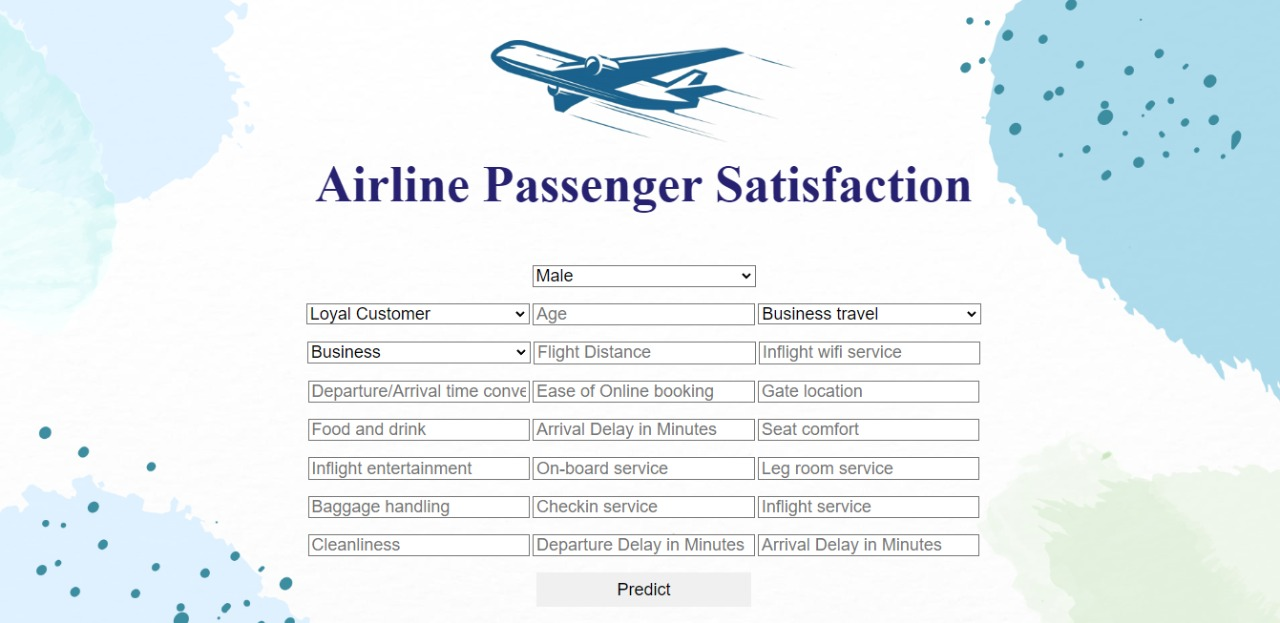

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Colab Notebooks/DMP/Images/1.jpeg")

So after entering the values in the form we can predict wether the passenger is satisfied or not.

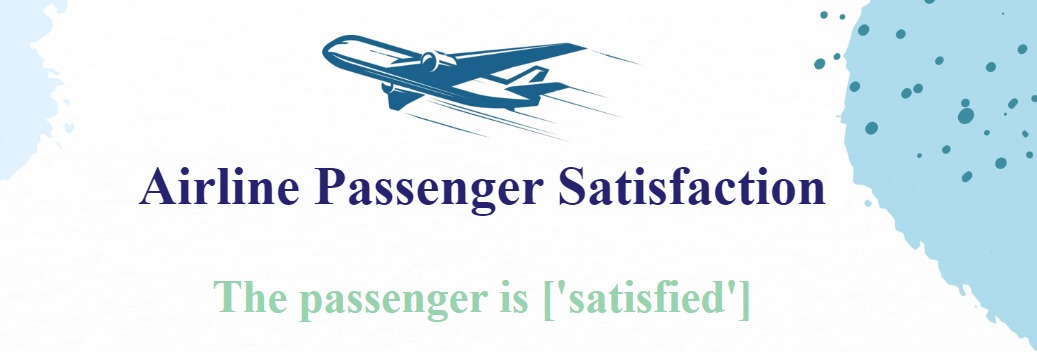

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Colab Notebooks/DMP/Images/3.jpeg")

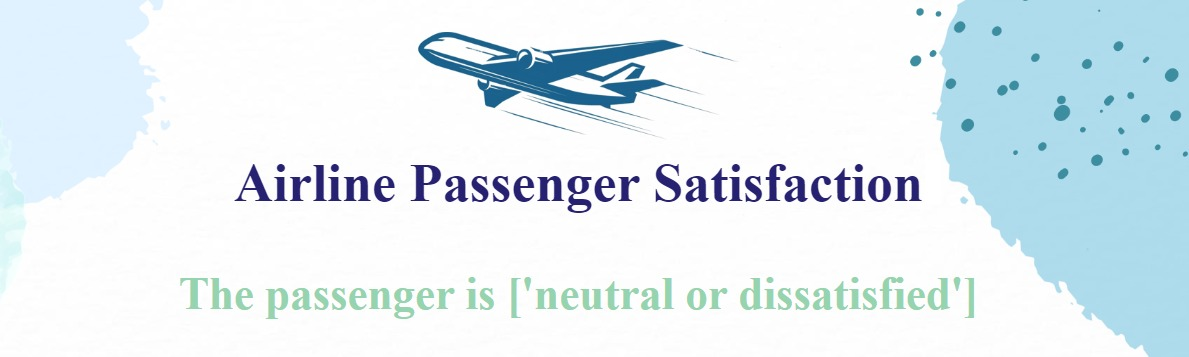

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Colab Notebooks/DMP/Images/5.jpeg")